<a href="https://colab.research.google.com/github/zamarripai/BTC-Price-Forecast---FBProphet/blob/main/BTC_30_Day_Price_Forcast_FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bitcoin Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing Necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

In [ ]:
 #Initializing Plotly

 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
from google.colab import files
files.upload()

Saving bitcoin_data.csv to bitcoin_data.csv


{'bitcoin_data.csv': b'Date,Close\r\n1/1/2016,435.66\r\n1/2/2016,435.4\r\n1/3/2016,431.91\r\n1/4/2016,433.85\r\n1/5/2016,433.34\r\n1/6/2016,430.87\r\n1/7/2016,459.07\r\n1/8/2016,454.44\r\n1/9/2016,450.38\r\n1/10/2016,449.99\r\n1/11/2016,449.19\r\n1/12/2016,434.01\r\n1/13/2016,432.77\r\n1/14/2016,430.03\r\n1/15/2016,357.53\r\n1/16/2016,388.7\r\n1/17/2016,378.46\r\n1/18/2016,384.89\r\n1/19/2016,375.27\r\n1/20/2016,418.54\r\n1/21/2016,409.38\r\n1/22/2016,382.9\r\n1/23/2016,387.5\r\n1/24/2016,403.05\r\n1/25/2016,391.4\r\n1/26/2016,391.54\r\n1/27/2016,394.79\r\n1/28/2016,379.61\r\n1/29/2016,378.68\r\n1/30/2016,378.46\r\n1/31/2016,367.95\r\n2/1/2016,371.33\r\n2/2/2016,372.93\r\n2/3/2016,368.87\r\n2/4/2016,387.99\r\n2/5/2016,384.5\r\n2/6/2016,375.44\r\n2/7/2016,377.49\r\n2/8/2016,371.14\r\n2/9/2016,372.68\r\n2/10/2016,378.44\r\n2/11/2016,378.23\r\n2/12/2016,382.05\r\n2/13/2016,391\r\n2/14/2016,406.59\r\n2/15/2016,398.95\r\n2/16/2016,407.42\r\n2/17/2016,415.2\r\n2/18/2016,421.19\r\n2/19/2016,4

In [ ]:
#read_csv function from pandas

df = pd.read_csv("bitcoin_data.csv")

In [ ]:
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [ ]:
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


# Data Visualization 

In [ ]:
# Area graph (Date Vs Price)

In [ ]:
px.area(df,x='Date',y='Close')

In [ ]:
# Violin plot

In [ ]:
px.violin(df,y='Close')

# Creating Facebook Prophet Model

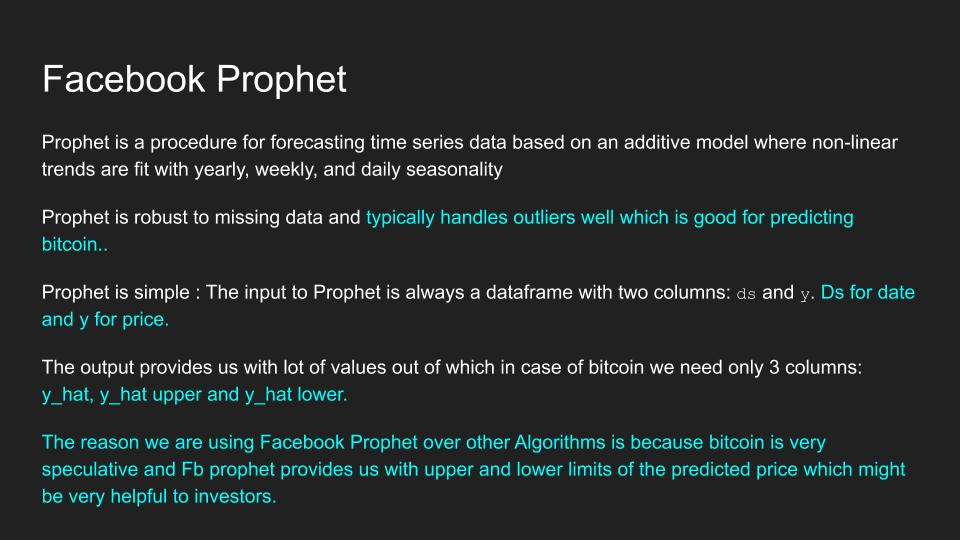

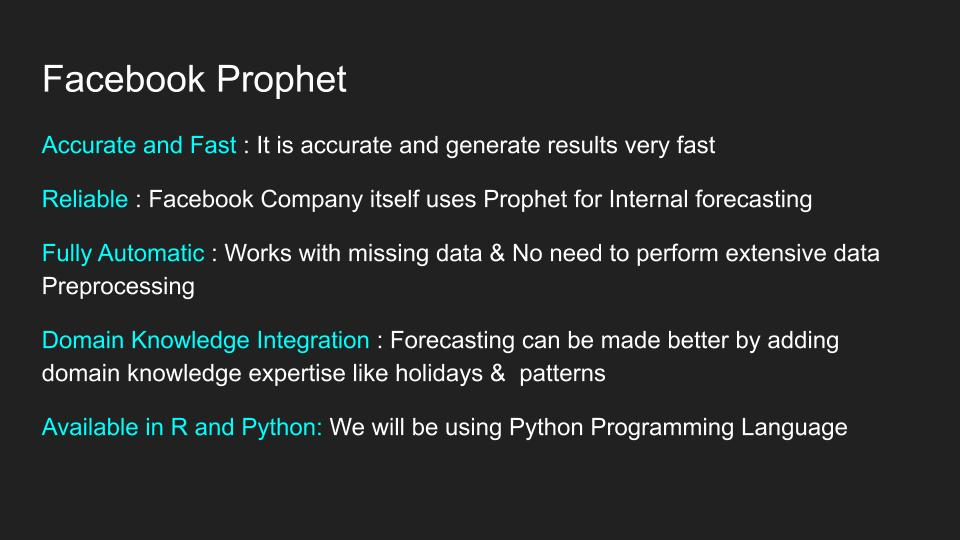

## Data Preperation

In [ ]:
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [ ]:
prophet_df = df.rename(columns = {'Date' : 'ds', 'Close' : 'y'})  

In [ ]:
prophet_df

,ds,y
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


## Modelling

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq8k6n2op/y1_qd_i0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq8k6n2op/2b7f8j08.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80876', 'data', 'file=/tmp/tmpq8k6n2op/y1_qd_i0.json', 'init=/tmp/tmpq8k6n2op/2b7f8j08.json', 'output', 'file=/tmp/tmpznl1qvsl/prophet_model-20220823005217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1151.278366,-79.525427,2801.619753,1151.278366,1151.278366,224.277496,224.277496,224.277496,-3.459731,-3.459731,-3.459731,227.737227,227.737227,227.737227,0.0,0.0,0.0,1375.555861
1,2016-01-02,1146.509087,-54.846005,2742.674215,1146.509087,1146.509087,207.244619,207.244619,207.244619,15.150567,15.150567,15.150567,192.094052,192.094052,192.094052,0.0,0.0,0.0,1353.753706
2,2016-01-03,1141.739808,-171.872514,2736.817698,1141.739808,1141.739808,149.547783,149.547783,149.547783,-9.039749,-9.039749,-9.039749,158.587532,158.587532,158.587532,0.0,0.0,0.0,1291.287591
3,2016-01-04,1136.970529,50.888142,2570.654966,1136.970529,1136.970529,145.943791,145.943791,145.943791,18.536305,18.536305,18.536305,127.407486,127.407486,127.407486,0.0,0.0,0.0,1282.914320
4,2016-01-05,1132.201251,-192.352615,2720.010604,1132.201251,1132.201251,94.454335,94.454335,94.454335,-4.161664,-4.161664,-4.161664,98.615999,98.615999,98.615999,0.0,0.0,0.0,1226.655586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9041.192786,7696.668173,10476.290305,8965.685726,9099.113051,-3.722481,-3.722481,-3.722481,15.150567,15.150567,15.150567,-18.873048,-18.873048,-18.873048,0.0,0.0,0.0,9037.470305
1731,2020-09-27,9041.657308,7536.157647,10355.238784,8958.797292,9110.162151,-69.117724,-69.117724,-69.117724,-9.039749,-9.039749,-9.039749,-60.077976,-60.077976,-60.077976,0.0,0.0,0.0,8972.539584
1732,2020-09-28,9042.121830,7656.798907,10440.532267,8953.704059,9113.495892,-82.466644,-82.466644,-82.466644,18.536305,18.536305,18.536305,-101.002949,-101.002949,-101.002949,0.0,0.0,0.0,8959.655186
1733,2020-09-29,9042.586352,7555.741566,10309.282638,8946.950634,9117.946301,-145.501234,-145.501234,-145.501234,-4.161664,-4.161664,-4.161664,-141.339571,-141.339571,-141.339571,0.0,0.0,0.0,8897.085117


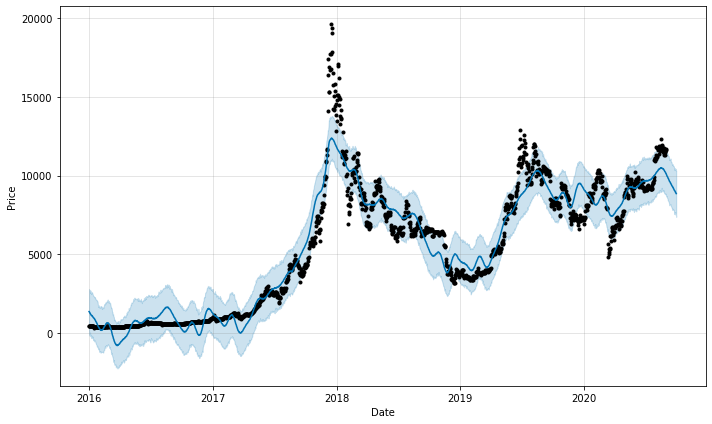

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

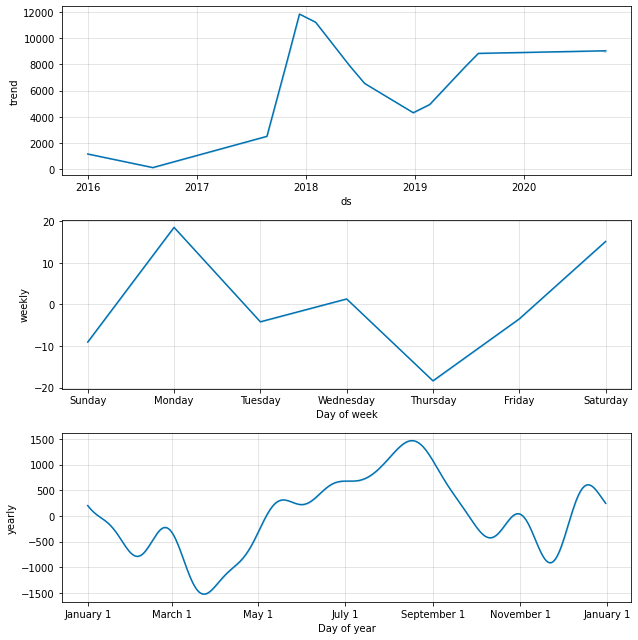

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
forecast.to_csv("forecast.csv")
from google.colab import files
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>